In [11]:
#pip install pandas

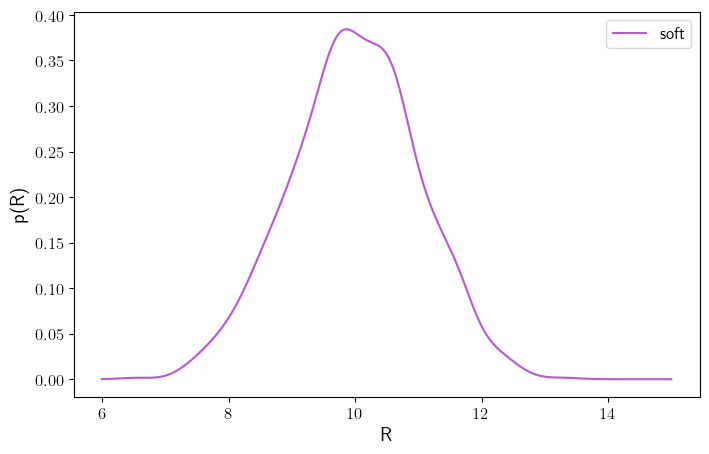

In [27]:
import numpy as np
import scipy.stats 
from scipy.stats import gaussian_kde as kde
from scipy.stats import norm
import matplotlib.pyplot as plot
import random

#Soft
np.random.seed(11)

A = norm(loc = 10, scale = 1)
B = A.rvs(size = 1000)
samples = np.sort(B)
#samples

x1 =  np.linspace(6,15,1000)
kernel1 = kde(samples)
kde1 = kernel1.pdf(x1)

plot.plot(x1,kde1 , label = "soft")
plot.xlabel("R")
plot.ylabel("p(R)")
plot.legend()

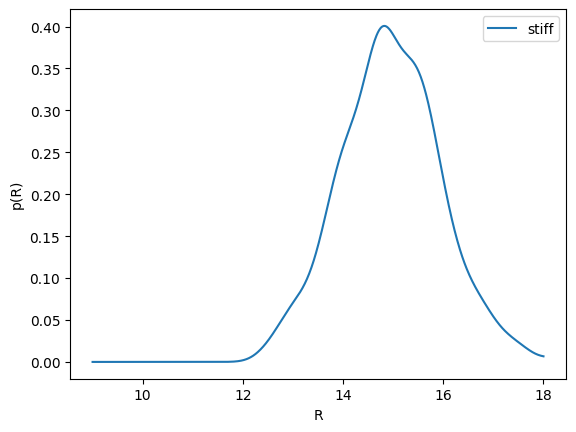

In [5]:
#Stiff

np.random.seed(2)
A = norm(loc = 15, scale = 1)
B = A.rvs(size = 1000)
samples = np.sort(B)
#samples

x2 =  np.linspace(9,18,1000)
kernel2 = kde(samples)
kde2 = kernel2.pdf(x2)

plot.plot(x2,kde2 , label = "stiff")
plot.xlabel("R")
plot.ylabel("p(R)")
plot.legend()

In [3]:
cd

/home/abhishekkulkarni


/home/abhishekkulkarni/miniconda3/envs/_tov/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/abhishekkulkarni/miniconda3/envs/_tov/lib/python3.11/site-packages/IPython/core/magics/osm.py:428: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
cd Desktop/Bayestack/

/home/abhishekkulkarni/Desktop/Bayestack


/home/abhishekkulkarni/miniconda3/envs/_tov/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
ls


Coderun/          hbpm_utils/  nr_files/            priors/    tutorial/
hbpm_analysis.py  LICENSE      observing_run_sims/  README.md


In [17]:
##Bayestack 

## basic imports
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import scipy.stats as st
import matplotlib
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles as mq
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde
from glob import glob
import pandas as pd
import sys 
import os
import pickle
from astropy import cosmology as co
from astropy.units import *
import dill
## Importing the accompanying utility and analysis files
sys.path.append(os.path.abspath('../hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

In [18]:
post_bandwidth = 0.15
prior_bandwidth = 0.4

In [19]:
import pandas as pd

In [20]:
## load the sampled empirical relation coefficients
#coeffs = pd.read_csv(hbpmloc+'/priors/sampled_empirical_relation_coefficients.tab',sep=' ')
#bootstrap = coeffs.to_numpy()

In [38]:
## fine grid
fs = np.linspace(1.5,4,200)
Ms = np.linspace(0.8,1.8,200)

In [39]:
## R prior 
# Rprior_kernel_mm, R16samples_mm 
Rs = np.linspace(9,15,200)
Rsamples_mm = samples
Rprior_kernel_ =  kernel1

In [40]:
##Uniform Prior
uniform_Rprior = st.uniform(loc=Rs.min(),scale=(Rs.max()-Rs.min()))

In [44]:
with open('priors/fprior.pickle','rb') as file:
    fprior = dill.load(file)

NameError: name 'np' is not defined

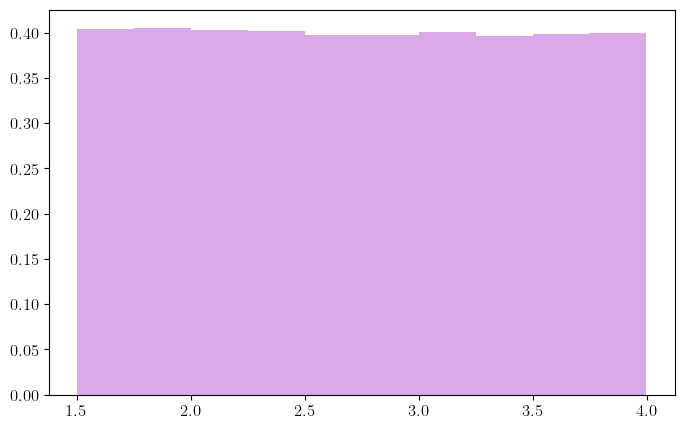

In [46]:
## plot the fpeak prior
plt.figure()
plt.hist(fprior.samples,density=True,alpha=0.5,label='O5 $\mathrm{f_{peak}}$'+' Prior Samples',bins=10)
plt.plot(fs,fprior.pdf(fs),label='$\\mathrm{f_{peak}}$ Prior KDE')
plt.xlabel('$\mathrm{f_{peak}}$ (kHz)')
plt.xlim(1.5,4)
# plt.yticks([])
plt.ylim(0,0.6)
plt.title('Peak Frequency Prior')
plt.legend(loc='lower right')
# plt.savefig('fpeak_prior_forcapstone.jpg',bbox_inches='tight')
plt.show()